---




#<div align="center"><font color='blue'>  </font></div>
# <div align="center"><font color='blue'>        Deep Learning  </font></div>
## <div align="center"> <font color='blue'> Assignment 1 Introduction to Deep Convolutional Neural Networks </font></div>
---

# Introduction
The aim of this assignment is to impliment Deep neural network to predict Action Unit and Emotion of image.    

**Dataset Detail**
- In this dataset we have total 560 different images. The dataset contains the information about imagepath, file_prefix, Subject, Sequence, image_index, facs codes and high level emotions columns.
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use("seaborn")

In [3]:
os.chdir("/content/drive/MyDrive/Data /")                                       # Setting the path of the data

## Exploratory Data Analysis
In this section, we will perform exploratory data analysis to gain insights into the dataset. We will explore the following aspects:

### Image Characteristics

Here starting  by analyzing the characteristics of the images in the dataset.

### Label Distribution

Next, analyzing the distribution of labels in the dataset



In [4]:
df = pd.read_csv("data_labels.csv")                                             # Loading the csv file from drive

In [5]:
df.head()

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


In [6]:
df.dtypes                                                                       # Data Type of each columns

subject               object
sequence               int64
image_index            int64
filepath              object
file_prefix           object
AU17                   int64
AU1                    int64
AU2                    int64
AU25                   int64
AU27                   int64
AU4                    int64
AU7                    int64
AU23                   int64
AU24                   int64
AU6                    int64
AU12                   int64
AU15                   int64
AU14                   int64
AU11                   int64
AU26                   int64
high_level_emotion    object
dtype: object

## Image Data Check
1. Verify Image Paths: Check if all image paths in the dataset are correct and accessible.

2. Count Images: Count the total number of images available in the dataset.


In [7]:
def Total_images(data):                                                         # Checking how many images in the dataset
  Total_image = 0                                                               # it is equal to the number of datapoint or not
  for i in range(len(data)):
    if os.path.exists(data["filepath"][i]):
      Total_image+=1
  return Total_image

In [8]:
Total_images(df)                                                                # Number of Images in our Dataset

560

Filtering Dataset based on Emotion Categories for plot the images

In [9]:
df["high_level_emotion"].value_counts()

negative    328
positive    121
surprise    111
Name: high_level_emotion, dtype: int64

In [10]:
negitive_images = df[df["high_level_emotion"]=="negative"]                      # Filtering Dataset based on Negitive emotion categories
negitive_images = negitive_images.reset_index(drop=True)                        # Create a small dataset only Negitive emotion images

In [11]:
positive_images = df[df["high_level_emotion"]=="positive"]                      # Filtering Dataset based on Positive emotion categories
positive_images = positive_images.reset_index(drop=True)                        # Create a small dataset only Positive emotion images

In [12]:
surprise_images = df[df["high_level_emotion"]=="surprise"]                      # Filtering Dataset based on Surprise emotion categories
surprise_images = surprise_images.reset_index(drop=True)                        # Create a small dataset only surprise emotion images

Creating a function that will plot the images with respect to emotions

In [13]:
def ploter(dataframe,title):
  fig, axes = plt.subplots(1, 3, figsize=(15, 3))                               # Using subplot for display a number of image
  for i in range(3):                                                            # Getting first three images
      image_path = dataframe["filepath"][i]                                     # Getting the image path from dataframe column

                                                                                # Open the image using Pillow
      image = Image.open(image_path)

                                                                                # Display the image using matplotlib
      plt.imshow(image,cmap='gray')
      axes[i].imshow(image, cmap='gray')
      axes[i].axis('off')
      axes[i].set_title(title)                                                  # Giving the title to the image according to the function input
  plt.tight_layout()
  plt.show()




**Ploting the image with emotion**
- By anaysing these images we can see that the size of images are different and there are different type of face expression.

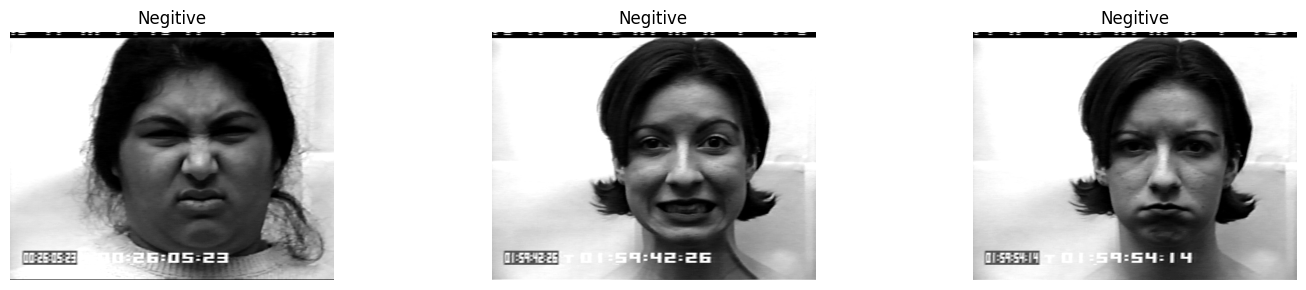

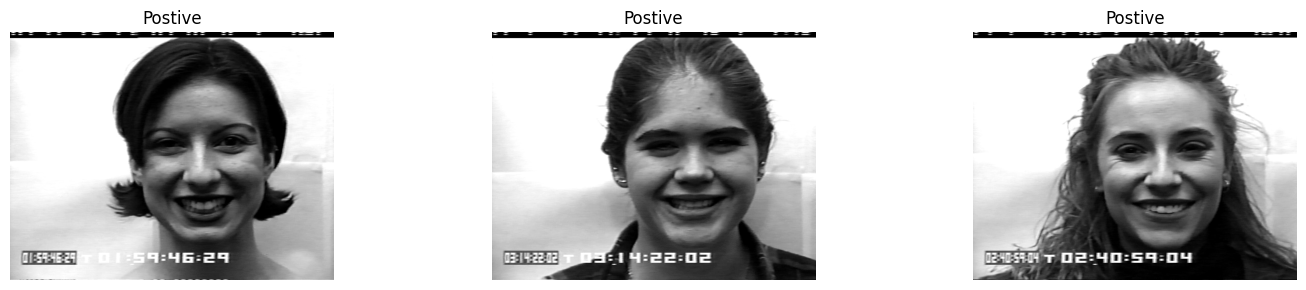

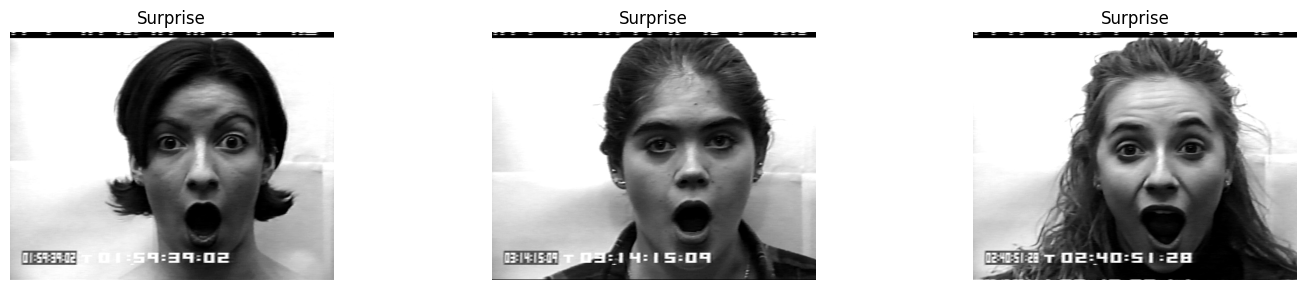

In [14]:
ploter(negitive_images, "Negitive")
ploter(positive_images,"Postive")
ploter(surprise_images,"Surprise") 

In [15]:
int_cols = list(df.columns[df.dtypes == np.int64 ])
list(int_cols)
int_cols = int_cols[2:-1]

In [16]:
for i in int_cols:
    print("\n"+ i+" Column data distribution 0 and 1 \n")
    print(df[i].value_counts(normalize=True))


AU17 Column data distribution 0 and 1 

0    0.639286
1    0.360714
Name: AU17, dtype: float64

AU1 Column data distribution 0 and 1 

0    0.683929
1    0.316071
Name: AU1, dtype: float64

AU2 Column data distribution 0 and 1 

0    0.791071
1    0.208929
Name: AU2, dtype: float64

AU25 Column data distribution 0 and 1 

1    0.521429
0    0.478571
Name: AU25, dtype: float64

AU27 Column data distribution 0 and 1 

0    0.855357
1    0.144643
Name: AU27, dtype: float64

AU4 Column data distribution 0 and 1 

0    0.653571
1    0.346429
Name: AU4, dtype: float64

AU7 Column data distribution 0 and 1 

0    0.783929
1    0.216071
Name: AU7, dtype: float64

AU23 Column data distribution 0 and 1 

0    0.892857
1    0.107143
Name: AU23, dtype: float64

AU24 Column data distribution 0 and 1 

0    0.896429
1    0.103571
Name: AU24, dtype: float64

AU6 Column data distribution 0 and 1 

0    0.780357
1    0.219643
Name: AU6, dtype: float64

AU12 Column data distribution 0 and 1 

0    0.76

Plotting the distribution of images across different emotion labels to understand the imbalance in our dataset.


In [17]:
df["high_level_emotion"].value_counts()                                         # Doing value count of high level emotion

negative    328
positive    121
surprise    111
Name: high_level_emotion, dtype: int64

In [18]:
label_feature_count = df["high_level_emotion"].value_counts(normalize = True)   # Normalize the values of different emotion

we can see that by this graph there is imbalance in emotion label like the negitive emotion is 58% and other two Positive and surprise are 21% and 19% respectively.

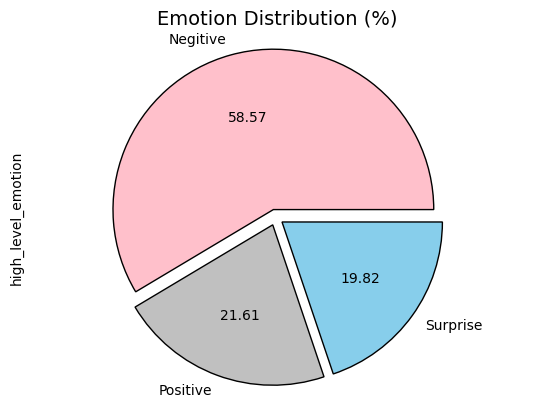

In [19]:
#ploting the pie plot
colors = ['pink', 'silver',"skyblue"]                                           # Using different colour for each slice
explode = (0.05, 0.05, 0.05)
labels = ["Negitive","Positive", "Surprise"]
label_feature_count.plot(kind='pie',autopct='%.2f',                             # Using different feature to plot the graph
                         wedgeprops = {"edgecolor":"black"},
               colors = colors,explode=explode,labels = labels)
plt.title("Emotion Distribution (%)",fontsize=14)                               # Giving tittle to the pie plot
plt.axis('equal')
plt.show()

 In this section, we examine the distribution of binary values in face code columns through bar graphs. The goal is to identify potential imbalances between the occurrences of 0s and 1s in these columns.

- These graphs reveal variations in the presence of binary values.

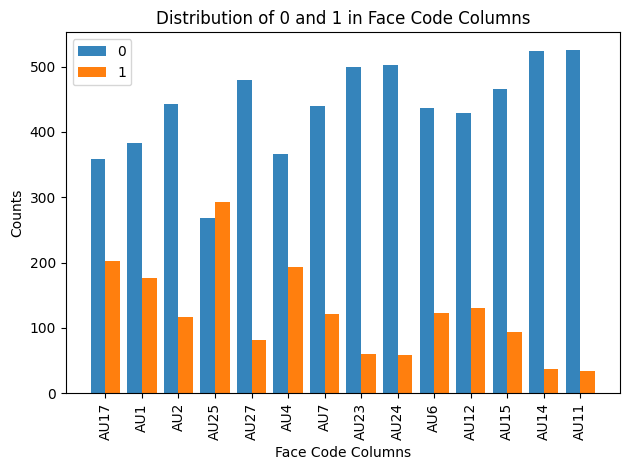

In [20]:
import matplotlib.pyplot as plt

                                                                                # Initialize lists to store counts of 0 and 1 for each column
count_Zero = []
count_One = []

                                                                                # Calculate counts for each Facs Code column column
for col in int_cols:                                                            # Int_col is the list of columns only face codes are present
    count_Zero.append(df[col].value_counts()[0])                                # Count of 0s
    count_One.append(df[col].value_counts()[1])                                 # Count of 1s

# Create a bar plot
fig, ax = plt.subplots()
bar_width = 0.40
index = range(len(int_cols))

bar1 = ax.bar(index, count_Zero, bar_width, label='0',alpha=0.9)                #ploting the bar with respect to 0 in a column
bar2 = ax.bar([i + bar_width for i in index], count_One, bar_width, label='1')  # #ploting the bar with respect to 1 in a column

ax.set_xlabel('Face Code Columns')
ax.set_ylabel('Counts')
ax.set_title('Distribution of 0 and 1 in Face Code Columns')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(int_cols, rotation='vertical')

ax.legend()

plt.tight_layout()
plt.show()


# Data Preprocessing

In this section we will go over the data preprocess steps

- Firstly, we will split the dataset into three parts training, validation and test data.


In [21]:
from sklearn.model_selection import train_test_split                            # Using Sklearn for spliting the dataset into tree parts

x_train, x_train_temp = train_test_split(df, test_size=0.3, random_state=42)    # split 60% of data for train the model by using train_test_split

                                                                                # Further split the temporary set into validation and testing sets
x_val, x_test = train_test_split(x_train_temp, test_size=0.5, random_state=42)  # spliting 20-20% for validation and testing

Size of the train, validation and test data

In [22]:
print("Shape of Training Data: ", x_train.shape,"\n")
print("Shape of Validation Data: ", x_val.shape,"\n")
print("Shape of Test Data: ", x_test.shape,"\n")

Shape of Training Data:  (392, 21) 

Shape of Validation Data:  (84, 21) 

Shape of Test Data:  (84, 21) 



To make the data suitable for the data generator, we need to convert the categorical values in the "high_level_emotion" column to numerical values.

We will convert the categorical labels `negative`, `positive`, and `surprise` to numerical values 0, 1, and 2, respectively.

In [23]:
x_train["high_level_emotion"] = x_train["high_level_emotion"].replace({"negative":0,"positive":1,"surprise":2})
x_val["high_level_emotion"] = x_val["high_level_emotion"].replace({"negative":0,"positive":1,"surprise":2})

#Custom Data Loader
In this section, we'll develop a custom data loader to convert the input and output according to the requirements of our model.
The core functionalities of the data loader include:
- Resizing the images to dimensions (224, 224) with 3 color channels.
- Optionally applying data augmentation to enhance training diversity.
- Converting labels using `keras.utils.to_categorical` to facilitate their compatibility with the model's format.


In [24]:
import tensorflow.keras as keras                                                #Loading the libraries that we need
from scipy.interpolate import interp1d
import numpy as np
from scipy.ndimage.interpolation import rotate, shift
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_frame, batch_size=32, dim=(224, 224, 3), n_classes=3,
                 num_facs_codes = 15, data_mean=0, data_std=1,  data_prefix='',
                 shuffle=True, Augment=True):
        'Initialization'
        self.dim = dim                                                          # Dimentions of the input image
        self.batch_size = batch_size                                            # Size of each batch
        self.n_classes = n_classes                                              # Number of emotion classes.
        self.shuffle = shuffle                                                  # Flag to shuffle data at the end of epoch
        self.Augment = Augment                                                  # Falg to augmentation the Image data
        self.num_facs_codes  = num_facs_codes                                   # Number of facs Code in dataset.

        # The input data is provided in the form of a pandas dataframe, from which we extract the necessary fields.

        self.data_frame = data_frame                                            # Initalization of dataframe
        self.image_label = data_frame['high_level_emotion'].values.tolist()     # Making list of the emotions by reading the data from high
                                                                                #level emotion column
        self.codes = data_frame[['AU17','AU1', 'AU2', 'AU25', 'AU27', 'AU4',
                                 'AU7', 'AU23', 'AU24', 'AU6','AU12', 'AU15',
                                 'AU14', 'AU11', 'AU26']].values.tolist()
                                                                                # Making list of  of all the facs code by filtering
                                                                                # The columns from dataaframe and using tolist
        self.image_ids = np.arange(len(self.image_label)).tolist()              # Creating alist of total label IDs
        self.data_prefix = data_prefix
        self.data_augmentor = ImageDataGenerator(rotation_range= 10,            # Using ImageDataGenerator library we are performing rotation,zooming,
                                                 width_shift_range=0.1,
                                                 height_shift_range=0.1,
                                                 zoom_range=(0.8, 1.2),
                                                 brightness_range=(0.5, 1.5))   # Brightness on image
    #horizontal_flip=True,vertical_flip=False,



        self.data_mean = data_mean                                              # Image Normalization parameter
        self.data_std = data_std

        self.on_epoch_end()

    def __len__(self):                                                          # This method is use to calcualte the batchs in each epoch
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.image_ids) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data for the given index'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size] # Generating indexes of the batches

        # Find list of IDs
        data_ids_temp = [self.image_ids[k] for k in indexes]                    # Try to find list of IDs for Image and labels.
        image_label_temp = [self.image_label[k] for k in indexes]
        code_label_temp  = [self.codes[k] for k in indexes]
        X, y = self.__data_generation(data_ids_temp, image_label_temp,
                                      code_label_temp)                          # Generating input and output data for each batch

        if self.Augment:                                                        # If augmentation True then it will perform the augmentation on Images.
          for i in range(len(X)):
              X[i] = self.apply_data_augmentation(X[i])

        return X,{'emotion_output': y[0], 'code_output': y[1]}                  # Image, Emotion and Facs Code output from this DataGenerator

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.image_ids))                           # Suffle the indexes after each epochs
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    # Support function

    def __data_generation(self, data_ids_temp, image_label_temp,code_label_temp):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.empty((self.batch_size, *self.dim))                              # Initialization empty numpy array for images
        y = np.empty((self.batch_size), dtype=int)                              # Initialization empty numpy array for Emotion Labels
        y_codes = np.empty((self.batch_size, self.num_facs_codes), dtype=int)   # Initialization  empty numpy array for Facs Code Labels
        for i, ids in enumerate(data_ids_temp):

            X[i,] = self.__read_data_instance(data_ids_temp[i])                 # For images it will go to private _read_data_instance method
            y[i] = image_label_temp[i]
            y_codes[i] = code_label_temp[i]
        return X, [keras.utils.to_categorical(y, num_classes=self.n_classes)    # Convert the labels by using into arrays
                  , y_codes]


    def __read_data_instance(self, pid):
      # Read an image
      filepath = self.data_prefix + self.data_frame.iloc[pid]['filepath']       # Reading the image by the filepath column

      data = Image.open(filepath)                                               # Open the image by using PIL Library
      data = data.resize((224,224))                                             # Resizing the image
      data = np.asarray(data)                                                   # COnverting the list into numpy array
    #  data = np.expand_dims(data, axis=-1)
      if data.shape[-1] != 3:                                                   # Coverting the one channel images into three channel
            data = np.stack([data] * 3, axis=-1)


      X = data

      #X = (X - self.data_mean) / self.data_std                                 # Normalize the image
      return X
    def apply_data_augmentation(self, image):

          if len(image.shape) == 3:
              image = self.data_augmentor.random_transform(image)               # Random transform the image and apply data_augmentor

          return image


                      ########### Trying to implement Oversampling Techniques But getting some error  ###########

    #def apply_oversampling(self,)
    # def oversampling(self):
    #   col = ['AU17','AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', 'AU24', 'AU6','AU12', 'AU15', 'AU14', 'AU11', 'AU26']
    #   new_col = []
    #   for i in col:
    #         count = self.data_frame[i].sum()
    #         if count < 100:
    #             new_col.append(i)
    #   new_data = []
    #   max_augment_per_col = 20  # Maximum number of augmentations per column

    #   for col in new_col:
    #       i = 0  # Counter for augmentations
    #       for index, row in self.data_frame.iterrows():
    #           if row[col] == 1 and i < max_augment_per_col:
    #               data = Image.open(row['filepath'])
    #               data = data.resize((224,224))
    #               data = np.asarray(data)
    #             #  data = np.expand_dims(data, axis=-1)
    #               if data.shape[-1] != 3:
    #                     data = np.stack([data] * 3, axis=-1)
    #               image = self.apply_data_augmentation(data)  # Apply augmentation to the image
    #               new_row = row.copy()  # Copy the original row

    #               # Update the 'filepath' value in the new_row list
    #               new_row['filepath'] = image

    #               # Append the new row to the new_data list
    #               new_data.append(new_row)
    #               i += 1  # Increment the counter
    #   return new_data



<ipython-input-24-7041793bd284>:4: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift
<ipython-input-24-7041793bd284>:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift


Transoforming the Training and validation data according to the model by passing the data from DataGenerator.
- Here we are converting the data without augmentation.

In [25]:
data_mean = 0.
data_std = 255.0                                                                # Define parameter to normalization
prefix=''
BATCH_SIZE = 32                                                                 # Defining each batch size

training_generator = DataGenerator(x_train,                                     # Using training to convert according to Model
                                   batch_size=BATCH_SIZE,                       # Initizing the parameter for training data
                                   data_mean=data_mean,
                                   data_std=data_std,
                                   n_classes=3,
                                   num_facs_codes = 15,
                                   Augment=False,
                                   data_prefix=prefix)
                                                                                # Initizing the parameter for Validation data
validation_generator = DataGenerator(x_val,
                                     batch_size=BATCH_SIZE,
                                     data_mean=data_mean,
                                     data_std=data_std,
                                     n_classes=3,
                                     num_facs_codes = 15,
                                     Augment=False,
                                     data_prefix=prefix)

In [26]:
print("Number of batches in one Epoch in Training Data : ",                     # By using len function printing the lenght of training Data
      training_generator.__len__())

print("\nNumber of batches in one Epoch in Validation Data : ",                 # By using len function printing the lenght of Validation Data
      validation_generator.__len__())

Number of batches in one Epoch in Training Data :  12

Number of batches in one Epoch in Validation Data :  2


In [27]:
for x, y in training_generator:                                                 # Checking the shape of Image in the training Generator
  print(x.shape)

(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)


Analysing the Images after Perprocessing

In [28]:
def plot(generated_data, title):                                                # Creating a function, the input is Generated data by
  for x,y in generated_data.__iter__():
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    fig.suptitle(title, fontsize=12)
    for i in range(3):                                                          # Printing first three image from the data

      plt.imshow(x[i,:,:,i], cmap='gray')                                       # This selects the i-th image from the batch.
                                                                                # The i index is used to select an image from the batch of shape
      axes[i].imshow(x[i,:,:,i], cmap='gray')
      axes[i].axis('off')
    plt.pause(.1)
    break



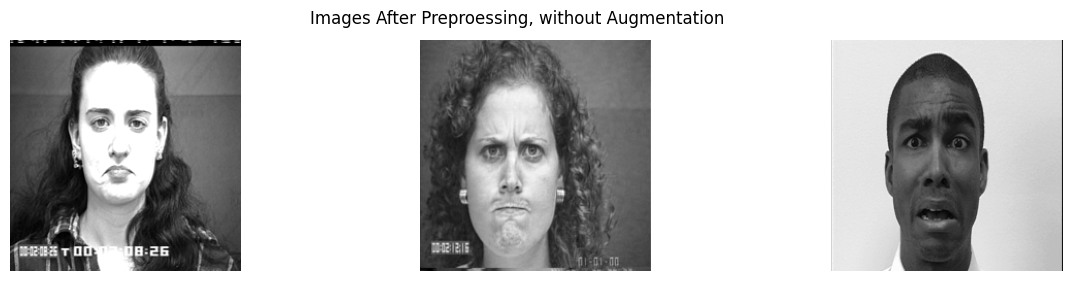

In [29]:
plot(training_generator,"Images After Preproessing, without Augmentation")

# Buliding Model Architecture

- Here We are using the VGG16 as a base model and using our own custom layer and adds custom classification layers for predicting both emotion and code classes.

In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout,Flatten,BatchNormalization

def build_custom_model(input_shape, num_classes_emotion, num_codes):


    vgg16_base = VGG16(weights='imagenet', include_top=False,                   # Load the pre-trained VGG16 model
                       input_shape=input_shape)

    for layer in vgg16_base.layers:                                             # Freeze all layers in the VGG16 base
        layer.trainable = False

    x = vgg16_base.output
                                                                                # Adding custom Layers at the top of the model
    x = Flatten()(x)                                                            # Adding Flatten layer to convert the size of the matrix to 1D
    x = BatchNormalization()(x)                                                 # Adding Batchnormalization layer
    #x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)                                        # Adding a custom Dense with 256 Nurons with relu activation function
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)                                                         # Adding a Dropout Layer

    emotion_output = Dense(num_classes_emotion, activation='softmax',           # Adding the output layer for emotion prediction
                           name='emotion_output')(x)
    code_output = Dense(num_codes, activation='sigmoid', name='code_output')(x) # Adding the output layer for facs codes prediction

    # Create and return the model

    model = Model(inputs=vgg16_base.input, outputs=[emotion_output, code_output])
    return model



In [31]:
input_shape = (224, 224, 3)                                                     # Adjust according to your image dimensions
num_classes_emotion = 3                                                         # Number of emotion classes
num_codes = 15                                                                  # Number of code classes

model_without_aug = build_custom_model(input_shape, num_classes_emotion,        # Making a instance of model to complie the model and training the model
                                       num_codes)
model_without_aug.summary()                                                     # Display the summary of the model

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                             

In [32]:
                                                                                # Compling the model with different factors

model_without_aug.compile(optimizer='adam',                                     # Using Adam optimizer for optimizing the parameter
                                                                                # In order to minimize the loss function

                          loss={'emotion_output': 'categorical_crossentropy',   # Using Different loss function for emotion and code output
                                'code_output': 'binary_crossentropy'},

                          metrics={"emotion_output":'accuracy',                 # Accuracy as performance metrix
                                   "code_output":"accuracy"})


In [33]:
m_histories = {}                                                                # Creating a dictionary to store the history of the model

                                                                                # Train the model on training data and validation
m_histories["Without_data_augmentation"] = model_without_aug.fit(training_generator,
                                                                 batch_size = 32,
                                                                 epochs = 50,
                                                                 validation_data = validation_generator)

Epoch 1/50
12/12 [==============================] - 42s 2s/step - loss: 3.6991 - emotion_output_loss: 2.7893 - code_output_loss: 0.9098 - emotion_output_accuracy: 0.4505 - code_output_accuracy: 0.0703 - val_loss: 36.7997 - val_emotion_output_loss: 33.6750 - val_code_output_loss: 3.1247 - val_emotion_output_accuracy: 0.2812 - val_code_output_accuracy: 0.2031
Epoch 2/50
12/12 [==============================] - 14s 1s/step - loss: 1.3365 - emotion_output_loss: 0.5951 - code_output_loss: 0.7414 - emotion_output_accuracy: 0.7891 - code_output_accuracy: 0.1146 - val_loss: 20.3567 - val_emotion_output_loss: 17.9990 - val_code_output_loss: 2.3577 - val_emotion_output_accuracy: 0.3125 - val_code_output_accuracy: 0.1562
Epoch 3/50
12/12 [==============================] - 6s 528ms/step - loss: 0.9569 - emotion_output_loss: 0.3023 - code_output_loss: 0.6546 - emotion_output_accuracy: 0.8802 - code_output_accuracy: 0.1458 - val_loss: 13.4413 - val_emotion_output_loss: 11.7343 - val_code_output_loss

# Learning Curves of Training and validation data

Through these graphs, we aim to visualize the learning curve and assess whether the model is exhibiting signs of overfitting. We analyze the learning curve in relation to epochs and the loss function.

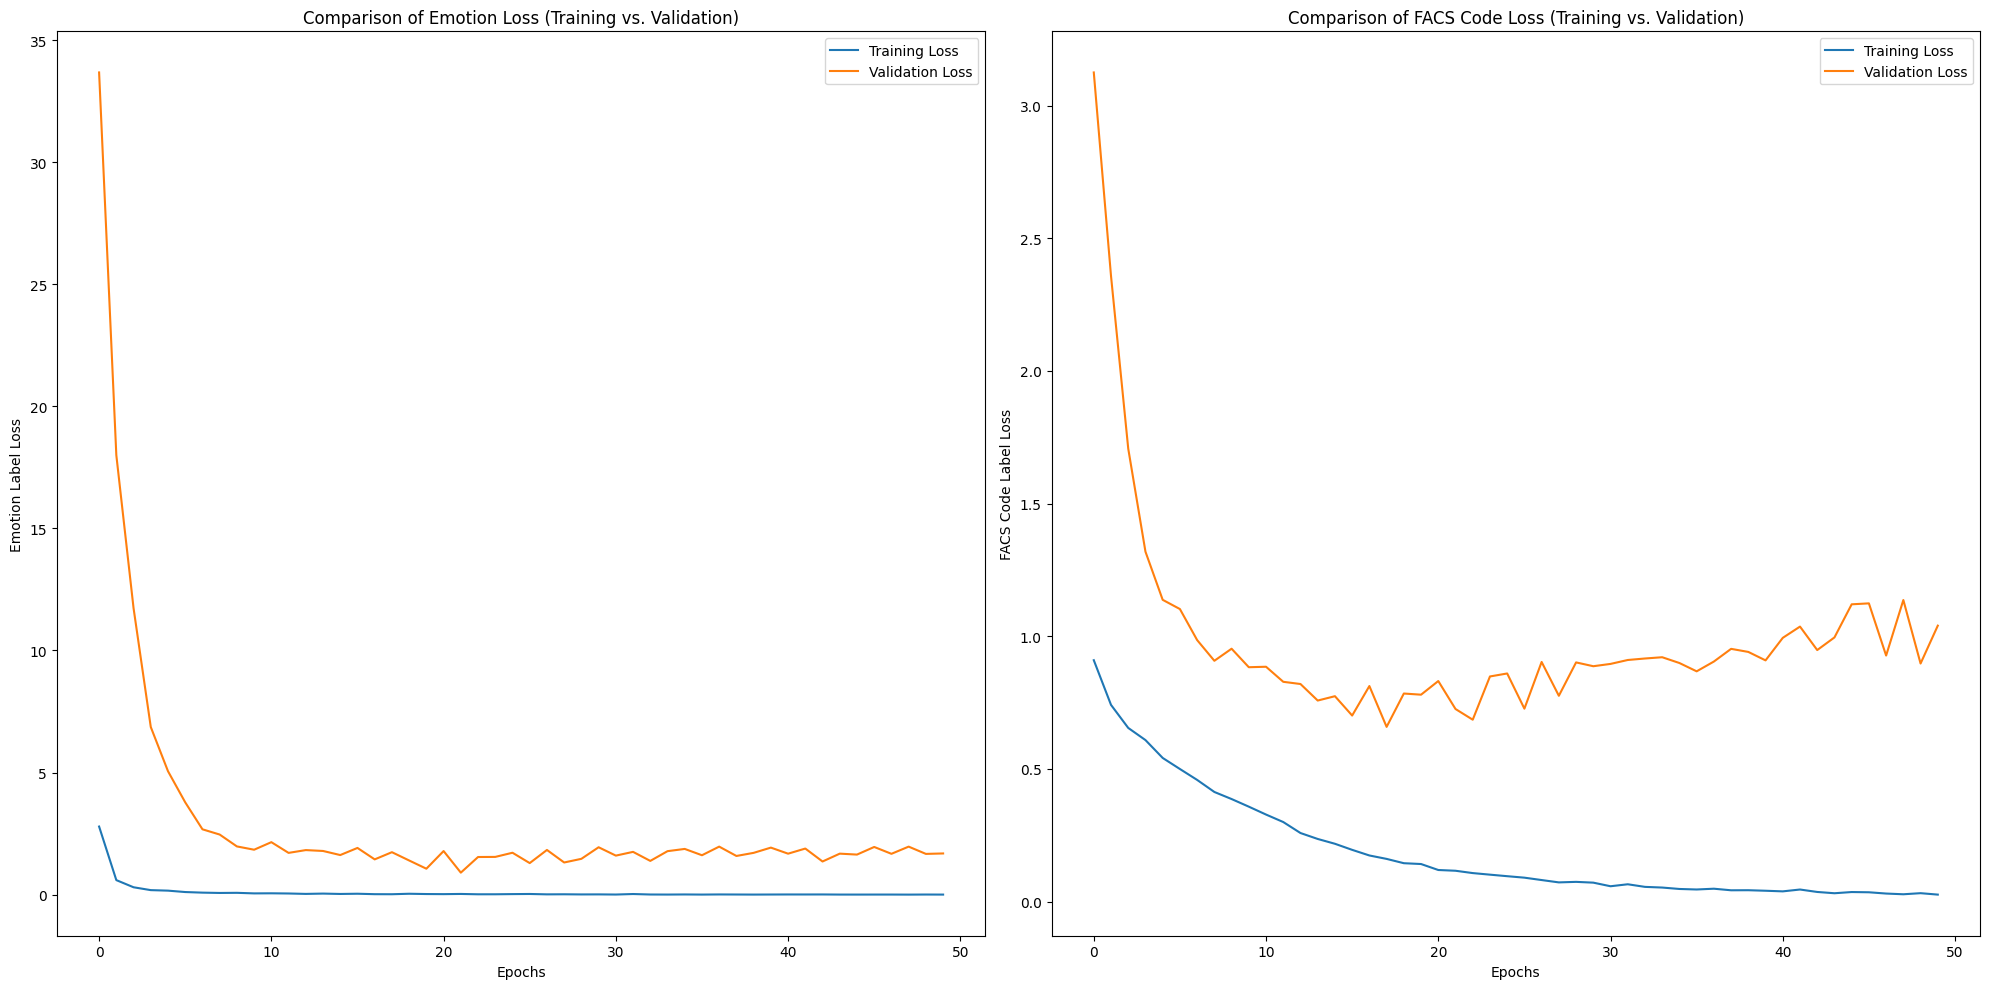

In [34]:
import matplotlib.pyplot as plt

                                                                                # Assuming m_histories contains the training histories
history = m_histories['Without_data_augmentation']

                                                                                # Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

                                                                                # Plot training and validation loss for emotion labels
axs[0].plot(history.history['emotion_output_loss'], label='Training Loss')
axs[0].plot(history.history['val_emotion_output_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Emotion Label Loss')
axs[0].legend()
axs[0].set_title('Comparison of Emotion Loss (Training vs. Validation)')

                                                                                # Plot training and validation loss for FACS code labels
axs[1].plot(history.history['code_output_loss'], label='Training Loss')
axs[1].plot(history.history['val_code_output_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('FACS Code Label Loss')
axs[1].legend()
axs[1].set_title('Comparison of FACS Code Loss (Training vs. Validation)')

                                                                                # Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Enhancements and Regularization Strategies

Upon analyzing these graphs, it becomes clear that the model is showing the  signs of overfitting. The fact shows that the training accuracy remains consistently high for a number of epochs, while the validation accuracy remains significantly lower.

To address this issue, we are implementing a range of regularization strategies. Specifically, we are introducing data augmentation, l1_l2 regularization, adjusting the Adam optimizer's learning rate, and incorporating EarlyStopping mechanism to improve the model's generalization performance.

In [35]:
input_shape = (224, 224, 3)                                                     # Adjust according to your image dimensions
num_classes_emotion = 3                                                         # Number of emotion classes
num_codes = 15                                                                  # Number of code classes.
model_with_aug = build_custom_model(input_shape, num_classes_emotion,
                                    num_codes)                                  # Creating a model instance

In [36]:
data_mean = 0.
data_std = 255.0
prefix=''
BATCH_SIZE = 32

training_generator_aug = DataGenerator(x_train,                                 # Using Data Augmentation True so it will convert or rotate the images
                                       batch_size=BATCH_SIZE,
                                       data_mean=data_mean,
                                       data_std=data_std,
                                       n_classes=3,
                                       num_facs_codes = 15,
                                       Augment=True,
                                       data_prefix=prefix)


Ploting the graphs after the data augmentation

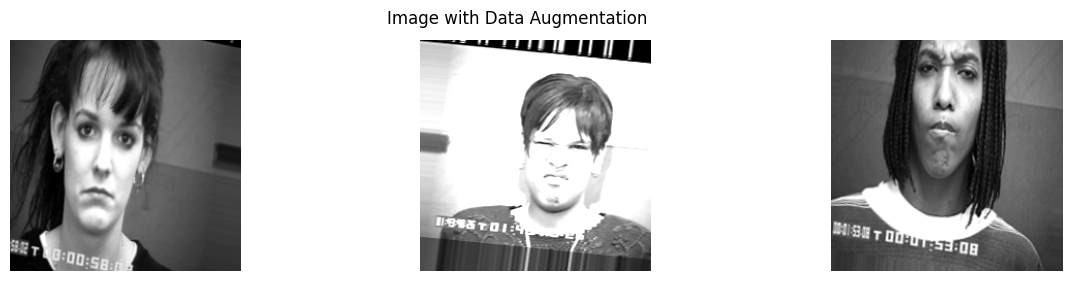

In [37]:
plot(training_generator_aug, "Image with Data Augmentation")

Using L1 and L2 both regularization techniques by using Keras API. and we are adding this regualization method with the model layer.

In [38]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1_l2

                                                                                # Define the strengths of l1 and l2 regularization
l1_strength = 0.01
l2_strength = 0.01

                                                                                # Loop through the layers of the model
for layer in model_with_aug.layers:
    if hasattr(layer, 'kernel_regularizer'):
                                                                                # Apply l1_l2 regularization to the layer's kernel weights
        layer.kernel_regularizer = l1_l2(l1=l1_strength, l2=l2_strength)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',                              # Define EarlyStopping callback to monitor 'val_loss'
                               patience=17,                                     # Patience 17: Number of epochs with no improvement after
                                                                                # which training will be stopped
                               restore_best_weights=True)



In [40]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001                                                           # Set the learning rate for the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)                                   # Create an instance of the Adam optimizer

                                                                                # Compile the model with the specified optimizer and
                                                                                # loss functions for each output
model_with_aug.compile(optimizer= optimizer,
                       loss={'emotion_output': 'categorical_crossentropy',
                            'code_output': 'binary_crossentropy'},
                        metrics={"emotion_output":'accuracy',
                                 "code_output":"accuracy"})


In [41]:
m_histories["With_data_augmentation"] = model_with_aug.fit(training_generator_aug,
                                                            batch_size = 32,
                                                           epochs = 30,
                                                           validation_data = validation_generator,
                                                           callbacks = early_stopping)
                                                                                #Train the model on training data and validation

Epoch 1/30
12/12 [==============================] - 14s 927ms/step - loss: 3.4679 - emotion_output_loss: 2.5584 - code_output_loss: 0.9095 - emotion_output_accuracy: 0.4714 - code_output_accuracy: 0.0964 - val_loss: 23.0380 - val_emotion_output_loss: 20.3491 - val_code_output_loss: 2.6889 - val_emotion_output_accuracy: 0.3125 - val_code_output_accuracy: 0.1406
Epoch 2/30
12/12 [==============================] - 10s 806ms/step - loss: 2.3455 - emotion_output_loss: 1.5479 - code_output_loss: 0.7977 - emotion_output_accuracy: 0.6354 - code_output_accuracy: 0.1042 - val_loss: 12.7342 - val_emotion_output_loss: 10.9262 - val_code_output_loss: 1.8080 - val_emotion_output_accuracy: 0.4688 - val_code_output_accuracy: 0.0469
Epoch 3/30
12/12 [==============================] - 9s 747ms/step - loss: 1.9291 - emotion_output_loss: 1.1891 - code_output_loss: 0.7400 - emotion_output_accuracy: 0.6641 - code_output_accuracy: 0.1042 - val_loss: 6.7289 - val_emotion_output_loss: 5.4146 - val_code_output_

**Visualize the Learning Curves after Appling data augmentation and regualization techniques.**

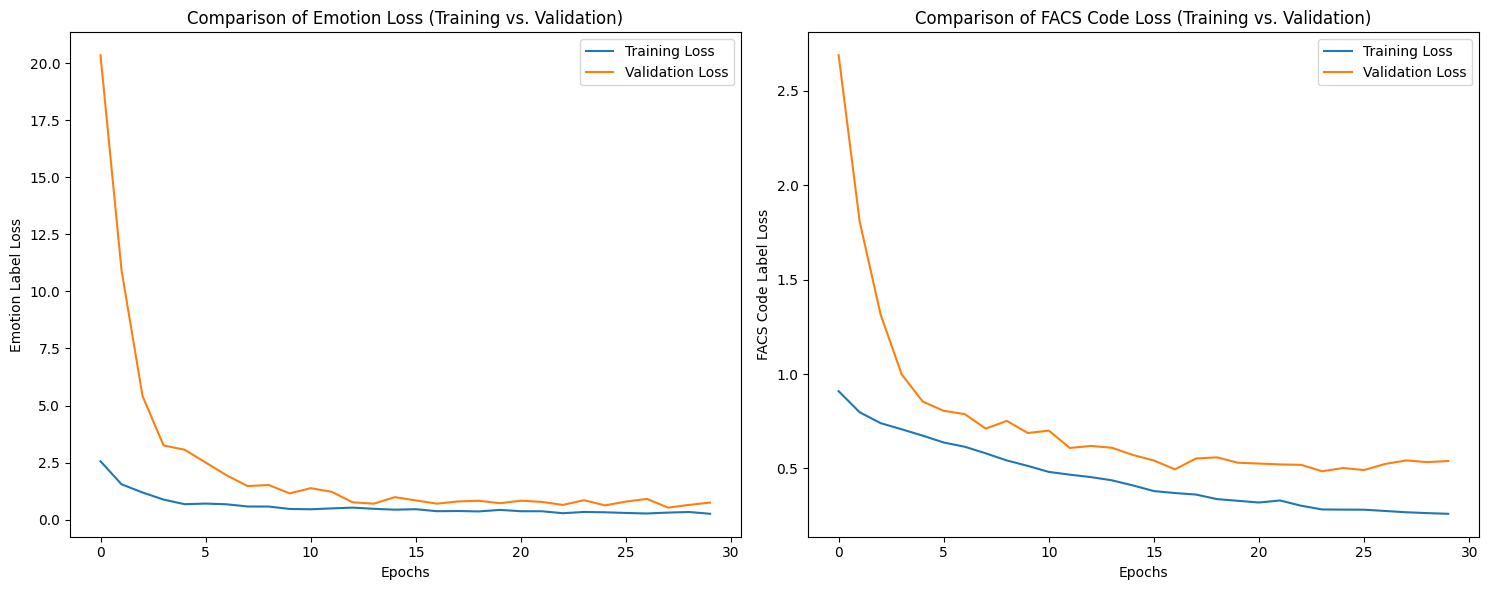

In [55]:
import matplotlib.pyplot as plt

# Assuming m_histories contains the training histories
history = m_histories['With_data_augmentation']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot training and validation loss for emotion labels
axs[0].plot(history.history['emotion_output_loss'], label='Training Loss')
axs[0].plot(history.history['val_emotion_output_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Emotion Label Loss')
axs[0].legend()
axs[0].set_title('Comparison of Emotion Loss (Training vs. Validation)')

# Plot training and validation loss for FACS code labels
axs[1].plot(history.history['code_output_loss'], label='Training Loss')
axs[1].plot(history.history['val_code_output_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('FACS Code Label Loss')
axs[1].legend()
axs[1].set_title('Comparison of FACS Code Loss (Training vs. Validation)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Prediction on Test Data
Predicting Emotion and Facs Code For a Single new Image and printing the output of the model on that image
- We can see that model is predicting the emotion class correctly
- We can see that there is few facs codes.

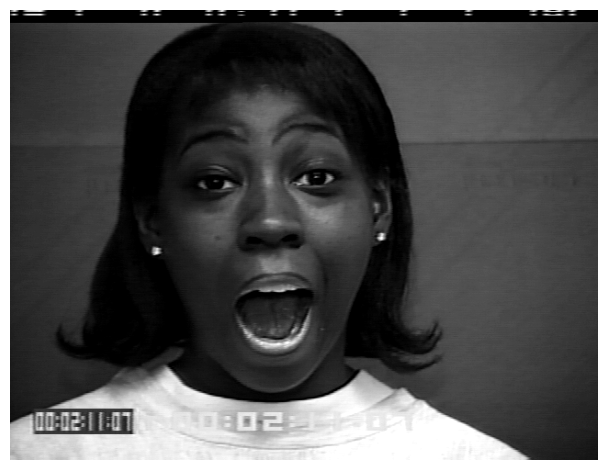

1/1 [==============================] - 1s 821ms/step
Predicted emotion class: surprise
Emotion confidence: 0.9999857
Predicted code classes: ['AU1', 'AU2', 'AU25', 'AU27', 'AU26']


In [43]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = './cohn-kanade-images/S051/002/S051_002_00000019.png'                # Load and preprocess the image

show_image = Image.open(img_path)

                                                                                # Display the image using matplotlib
plt.imshow(show_image,cmap='gray')
plt.imshow(show_image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)                                   # Add batch dimension
img_array = preprocess_input(img_array)                                         # Apply VGG16 preprocessing


predictions = model_with_aug.predict(img_array)                                 # Getting predictions from the model


emotion_predictions = predictions[0]                                            # Slicing prediction list first is Emotion Prediction
code_predictions = predictions[1]                                               # Facs Code Prediction


emotion_class_labels = ["negitive","positive", "surprise"]                      # Describing the emotion labels
predicted_emotion_idx = np.argmax(emotion_predictions)                          # Getting the maximum emotion Index
predicted_emotion_class = emotion_class_labels[predicted_emotion_idx]           # Mapping predicted emotion Index with emotion label
emotion_confidence = emotion_predictions[0][predicted_emotion_idx]


code_class_labels = ['AU17','AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', # Describing Facs Code Labels
                     'AU24', 'AU6','AU12', 'AU15', 'AU14', 'AU11', 'AU26']
predicted_code_indices = np.where(code_predictions[0] > 0.5)[0]                 # Binary thresholding
                                                                                # Mapping with Facs Code index and Facs labels
predicted_code_classes = [code_class_labels[idx] for idx in predicted_code_indices]

print("Predicted emotion class:", predicted_emotion_class)
print("Emotion confidence:", emotion_confidence)
print("Predicted code classes:", predicted_code_classes)


Changing the emotion string label into numerical values in test Data

In [44]:
x_test["high_level_emotion"] = x_test["high_level_emotion"].replace({"negative":0,"positive":1,"surprise":2})

Predicting Emotion class and Facs Code for each Images by passing through the model. When er pass the image through the model it will give us the emotion class and facs code and we are storing these prediction into lists so that we can use for model evaluation in next step

In [45]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import classification_report,accuracy_score

all_emotion_predictions = []                                                    # List of predicted emotion class
facs_predicted_array = []                                                       # List of Predicted Facs Code
threshold = 0.5                                                                 # Set a threshold for each facs code

for index, row in x_test.iterrows():                                            # Loop through the test data
    img_path = row['filepath']                                                  # Get the image path from the DataFrame

    img = image.load_img(img_path, target_size=(224, 224))                      # Open the image
    img_array = image.img_to_array(img)                                         # Converting into array
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model_with_aug.predict(img_array,verbose=0)                   # Get predictions from the model
    emotion_predictions = predictions[0]                                        # Emotion Prediction
    code_predictions = predictions[1]                                           # Facs Code prediction
    all_emotion_predictions.append(np.argmax(emotion_predictions))              # Taking high probability Emotion out of three
    binary_code_predictions = (code_predictions > threshold).astype(int)        # Using Threshold taking Facs Codes 0 or 1
    facs_predicted_array.append(binary_code_predictions)



all_actual_emotion = x_test["high_level_emotion"].to_list()                     # Making the list of true labels of Emotion Class
emotion_class_labels = ["negative", "positive", "surprise"]

true_facs_codes = []
mask_test_df = x_test[['AU17','AU1', 'AU2', 'AU25', 'AU27','AU4', 'AU7','AU23', # Dataframe filttering only taking facs code columns
                       'AU24', 'AU6','AU12', 'AU15', 'AU14', 'AU11',
                       'AU26']]
# Iterate through each row in the DataFrame

for index, row in mask_test_df.iterrows():
    true_facs_codes.append(row.tolist())                                        # Making List of all true Facs codes

Predicted_facs_code = [item[0].tolist() for item in facs_predicted_array]       # The predicted facs_code is array of arrays so Converting
                                                                                #them into list of list

# Model Evaluation  
- Evaluating model preformance by using classification report and Heapmap for emotion class
- Evaluating Facs Codes accuracy by using different methods by printing the confusion matrix for each facs code spreatly  

In [52]:
emotion_report = classification_report(all_actual_emotion,                # making the classification report of Emotion Class
                                       all_emotion_predictions,
                                       target_names=emotion_class_labels)
print(emotion_report)
print("\n Accuracy of the model with respect to Emotion Class\n")               # Printing the classification Report
print(accuracy_score(all_actual_emotion,all_emotion_predictions))         # Printing the accuracy of the model on test data for emotion class

              precision    recall  f1-score   support

    negative       0.78      0.82      0.80        57
    positive       0.33      0.38      0.36        13
    surprise       0.89      0.57      0.70        14

    accuracy                           0.71        84
   macro avg       0.67      0.59      0.62        84
weighted avg       0.73      0.71      0.72        84


 Accuracy of the model with respect to Emotion Class

0.7142857142857143


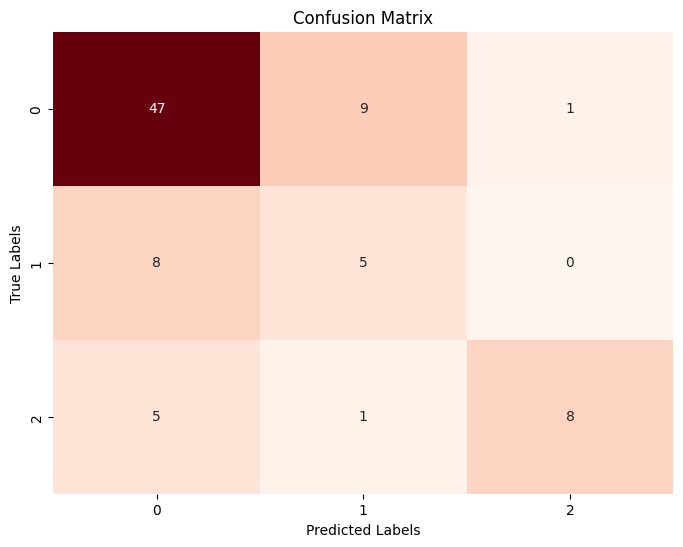

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

                                                                                # Calculate the confusion matrix using true_emotion_labels
                                                                                # and predicted_emotion_labels
con_matrix = confusion_matrix(all_actual_emotion, all_emotion_predictions)
                                                                                # heapmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Confusion Matrix")                                                   # Set the title of the plot
plt.xlabel("Predicted Labels")                                                  # Label for the x-axis
plt.ylabel("True Labels")                                                       # Label for the y-axis
plt.show()                                                                      # Display the heatmap

### Facs Code Evaluation

In [48]:
from sklearn.metrics import precision_recall_fscore_support

Facs_codes = ['AU17', 'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23',
              'AU24', 'AU6', 'AU12', 'AU15', 'AU14', 'AU11', 'AU26']

                                                                                # Each row represents the labels for one instance
true_facs_codes = np.array(true_facs_codes)
Predicted_facs_code = np.array(Predicted_facs_code)

                                                                                # Compute Micro-Averaging metrics
micro_metrics = precision_recall_fscore_support(true_facs_codes,
                                  (Predicted_facs_code > 0.5).astype(int),
                                  average='micro')

micro_precision, micro_recall, micro_f1, _ = micro_metrics

print("Micro-Averaging Metrics:")
print(f"Micro-Precision: {micro_precision:.2f}")
print(f"Micro-Recall: {micro_recall:.2f}")
print(f"Micro-F1: {micro_f1:.2f}")
print("=" * 80)

                                                                                # Compute Macro-Averaging metrics

macro_metrics = precision_recall_fscore_support(true_facs_codes,
                                    (Predicted_facs_code > 0.5).astype(int),
                                    average='macro')
macro_precision, macro_recall, macro_f1, _ = macro_metrics

print("Macro-Averaging Metrics:")
print(f"Macro-Precision: {macro_precision:.2f}")
print(f"Macro-Recall: {macro_recall:.2f}")
print(f"Macro-F1: {macro_f1:.2f}")
print("=" * 80)


Micro-Averaging Metrics:
Micro-Precision: 0.50
Micro-Recall: 0.52
Micro-F1: 0.51
Macro-Averaging Metrics:
Macro-Precision: 0.43
Macro-Recall: 0.44
Macro-F1: 0.43


In [49]:
from sklearn.metrics import multilabel_confusion_matrix
Facs_codes = ['AU17', 'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7',               # Facs Codes list
              'AU23', 'AU24', 'AU6','AU12', 'AU15', 'AU14', 'AU11', 'AU26']

confusion_metrixs = multilabel_confusion_matrix(true_facs_codes,                # Multilabel confusion matrices for each Facs Code
                                                Predicted_facs_code)

for idx, label in enumerate(Facs_codes):                                        # Loop through each label
    print(f"Confusion Matrix for Label: {label}\n")
    print(confusion_metrixs[idx])                                               # Display its corresponding confusion matrix
    print("\n"+"=" * 40 + "\n")

Confusion Matrix for Label: AU17

[[26 16]
 [11 31]]


Confusion Matrix for Label: AU1

[[47 11]
 [15 11]]


Confusion Matrix for Label: AU2

[[65  4]
 [ 4 11]]


Confusion Matrix for Label: AU25

[[42  3]
 [17 22]]


Confusion Matrix for Label: AU27

[[70  3]
 [ 2  9]]


Confusion Matrix for Label: AU4

[[34 18]
 [13 19]]


Confusion Matrix for Label: AU7

[[48 18]
 [ 9  9]]


Confusion Matrix for Label: AU23

[[64 12]
 [ 6  2]]


Confusion Matrix for Label: AU24

[[63  9]
 [ 9  3]]


Confusion Matrix for Label: AU6

[[57 11]
 [ 8  8]]


Confusion Matrix for Label: AU12

[[58  9]
 [10  7]]


Confusion Matrix for Label: AU15

[[52 12]
 [14  6]]


Confusion Matrix for Label: AU14

[[75  3]
 [ 4  2]]


Confusion Matrix for Label: AU11

[[77  3]
 [ 4  0]]


Confusion Matrix for Label: AU26

[[72  7]
 [ 4  1]]




In [50]:
label_reports = []                                                              # Compute classification report for each label
for label_idx in range(len(Facs_codes)):                                        # Looping through each Facs Code label

    label_ground_truth = true_facs_codes[:, label_idx]                          # True Labels of Facs code
    label_predictions = Predicted_facs_code[:, label_idx]                       # Predicted labels of Facs code


    label_report = classification_report(label_ground_truth,                    # Creating classification Repport for each Facs Code
                                         label_predictions,
                                         target_names=['Not ' +
                                                       Facs_codes[label_idx],
                                                       Facs_codes[label_idx]])
    label_reports.append(label_report)

                                                                                # Print label-wise metrics
for label_idx, label_report in enumerate(label_reports):
    print(f"Metrics for {Facs_codes[label_idx]}:")                              # Printing the classification Report
    print(label_report)
    print("=" * 80)


Metrics for AU17:
              precision    recall  f1-score   support

    Not AU17       0.70      0.62      0.66        42
        AU17       0.66      0.74      0.70        42

    accuracy                           0.68        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.68      0.68      0.68        84

Metrics for AU1:
              precision    recall  f1-score   support

     Not AU1       0.76      0.81      0.78        58
         AU1       0.50      0.42      0.46        26

    accuracy                           0.69        84
   macro avg       0.63      0.62      0.62        84
weighted avg       0.68      0.69      0.68        84

Metrics for AU2:
              precision    recall  f1-score   support

     Not AU2       0.94      0.94      0.94        69
         AU2       0.73      0.73      0.73        15

    accuracy                           0.90        84
   macro avg       0.84      0.84      0.84        84
weighted avg       0.9